[2024-08-16 Fiddler](https://thefiddler.substack.com/p/how-high-can-you-jump)
====================
Let $a+b = 1$.

The height is

In [1]:
%display latex
y(theta) = cos(theta)
y

theta |--> cos(theta)

Then, the vertical center of mass is

In [2]:
a = integral(y,theta,-pi/2,pi/2)/pi
(a,numerical_approx(a))

(2/pi, 0.636619772367581)

And the ratio is

In [3]:
b = 1-a
((a/b).simplify_full(),numerical_approx(a/b))

(2/(pi - 2), 1.75193839388411)

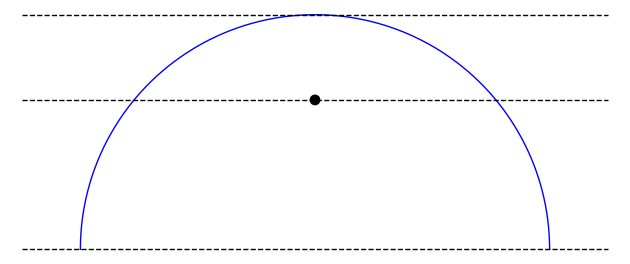

In [4]:
plot(sqrt(1-x^2),x,-1,1,axes=false) + circle((0,a),0.02,fill=true,color='black') \
  + plot([0,a,1],x,-1.25,1.25,axes=false,linestyle='dashed',color='black')

Extra credit
------------
Let $a + b = 1 - \cos\phi$.

In [5]:
phi = var('phi')
b = 1 - integral(y, theta, -phi, phi)/(2*phi)
b

-sin(phi)/phi + 1

In [6]:
a = 1 - b - cos(phi)
(a/b).simplify_full()

-(phi*cos(phi) - sin(phi))/(phi - sin(phi))

It looks like the ratio approaches 2 for small $\phi$

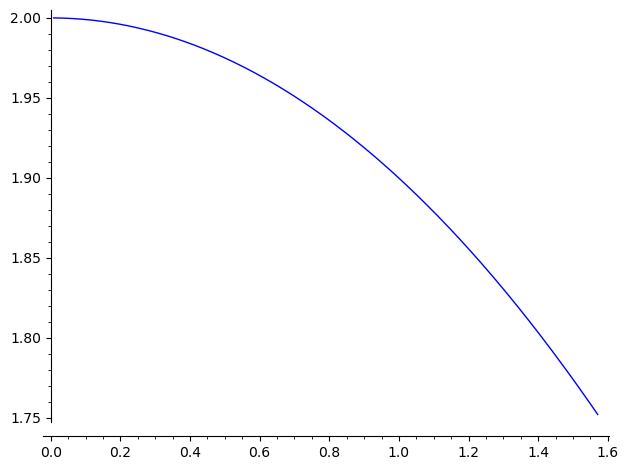

In [7]:
plot(a/b, phi, 0, pi/2)

But, zooming in on small $\phi$, there's wild oscillation.  That might be numerical noise.

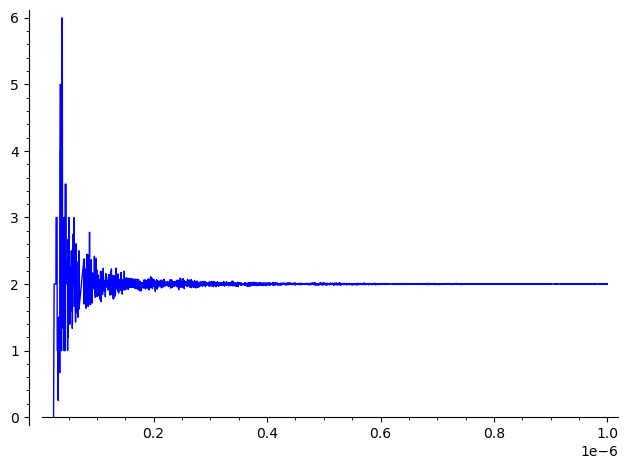

In [8]:
plot(a/b, phi, 0, 1e-6)

Taking the power series expansion around $\phi=0$,

In [9]:
(a/b).series(phi,3).simplify()

-1/10*phi + 2/phi + Order(phi^3)

The $2/\phi$ term seems like some weird artifact.  Let's try something

In [10]:
(a/b).simplify_full().series(phi,3)

2 + (-1/10)*phi^2 + Order(phi^3)

That convinces me that the ratio approaches 2 rather than $2/\phi$, and there's some bug
in the power series algorithm.  That also cleans up some of the numerical noise.

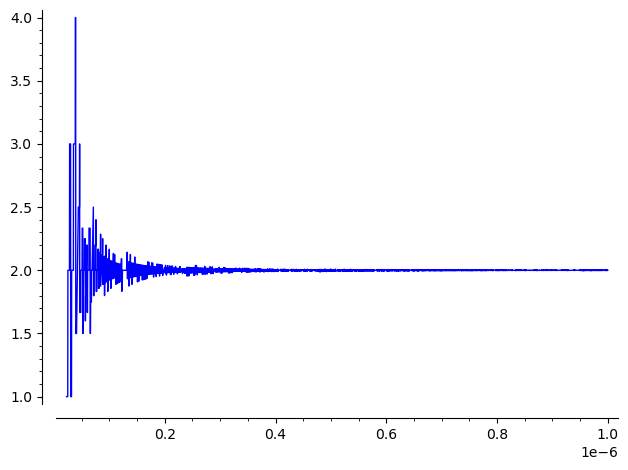

In [11]:
plot((a/b).simplify_full(), phi, 0, 1e-6)

Look at some plots for a few different values of $\phi$

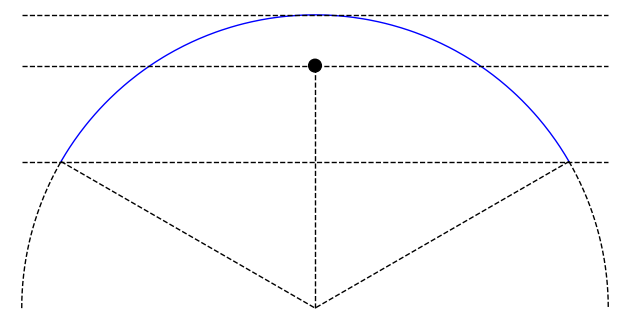

In [12]:
def make_plot(phi0,xmax=1,ymin=0,aspect_ratio=1):
    return plot(sqrt(1-x^2),x,-sin(phi0),sin(phi0),axes=false,aspect_ratio=aspect_ratio,
               xmin=-xmax,xmax=xmax,ymin=ymin,ymax=1) \
        + ellipse((0,1-b(phi=phi0)),0.025*sin(phi0),0.025*sin(phi0)/aspect_ratio,fill=true,color='black') \
        + plot([cos(phi0),1-b(phi=phi0),1],x,-xmax,xmax,linestyle='dashed',color='black') \
        + plot(sqrt(1-x^2),x,-1,-sin(phi0),linestyle='dashed',color='black') \
        + plot(sqrt(1-x^2),x,sin(phi0),1,linestyle='dashed',color='black') \
        + plot(abs(x*cot(phi0)),x,-sin(phi0),sin(phi0),linestyle='dashed',color='black') \
        + line([(0,0),(0,1-b(phi=phi0))],linestyle='dashed',color='black')
make_plot(pi/3)

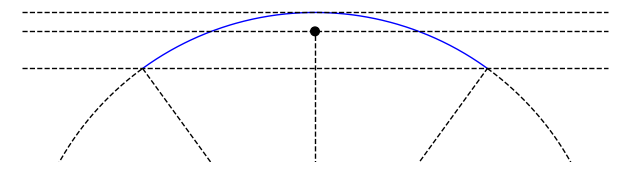

In [13]:
make_plot(pi/5,1,0.5)

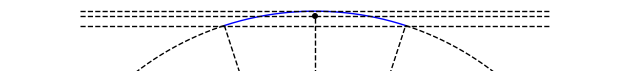

In [14]:
make_plot(pi/10,0.8,0.8)

For even smaller $\phi$, I have to stretch the plot vertically to be able to see the
different heights.

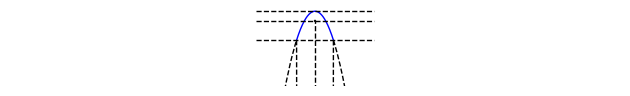

In [15]:
make_plot(pi/50,0.2,0.995,50)

And $2-\phi^2/10$ is very good approximation for the ratio all the way up to $\phi=\pi/2$.

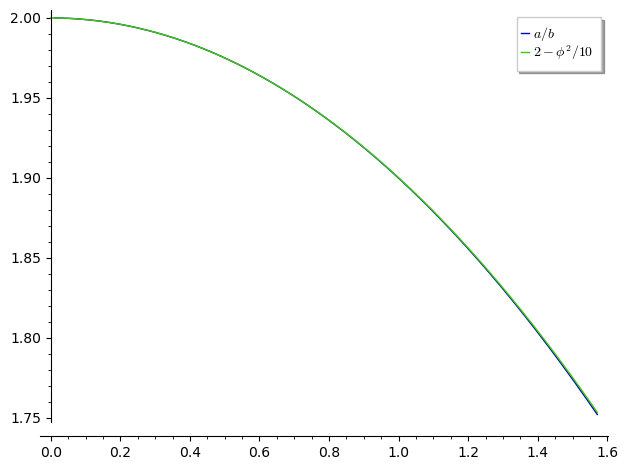

In [16]:
plot([a/b,2-phi^2/10],phi,0,pi/2,legend_label=['$a/b$','$2-\phi^2/10$'])

Making the rounds
-----------------
### Some thoughts
It's always possible to construct a number in all positions of _non_-primitive triples.
If $(a,b,c)$ is a triple, then $(abc,b^2c,bc^2)$, $(a^2c,abc,ac^2)$, and $(a^2b,ab^2,abc)$
are triples with $abc$ in the three spots.

In a primitive triple, at least two of the numbers must be odd, otherwise 2 would be a
common factor.  One of the numbers must be even, since the sum of two odd numbers must
be even and the sum of an odd and an even must be odd.

In [17]:
i, j = var('i,j')
((2*i+1)^2 + (2*j+1)^2).expand()

4*i^2 + 4*j^2 + 4*i + 4*j + 2

The sum of two odd squares is never a multiple of 4, so $c$ must be odd, so any number in all three spots
must be odd.

In [18]:
((2*i+1)^2 + 4*j^2).expand()

4*i^2 + 4*j^2 + 4*i + 1

The sum of an odd square and an even square is one more than a multiple of four, so
the square of any number in all three spots must also be one more than a multiple of four.

For a number to be in two spots, $x^2 + y^2 + z^2 = c^2$, where $x^2 + y^2$ is the square of
the number, and $x$ and $c$ are odd, and $y$ and $z$ are even.  For the number to be in all
three, need to be able to find $z$ and $c$ such that $x^2+y^2 > z^2$ and another $z$ and $c$
such that $x^2+y^2 < z^2$.  I think it will come down to proving that at least one of the $c$
or $z$ must have a common factor with $x^2+y^2$.  Or maybe a $c$, $z$ pair must share a common
factor.  I don't know to prove that, but if I could that would mean there is no number that is
in all three spots.

In [23]:
(a/b).simplify_full().series(phi,15)

2 + (-1/10)*phi^2 + (-1/4200)*phi^4 + 1/126000*phi^6 + 89/388080000*phi^8 + 1579/454053600000*phi^10 + 5069/190702512000000*phi^12 + (-1013/4631346720000000)*phi^14 + Order(phi^15)